In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def repl(X):
    return X*((A-I)@X-np.sum((A-I)*np.outer(X,X)))

In [17]:
def meanKatz(A):
    s = np.sum(surv)
    return np.sum(-I+np.linalg.inv(I-A/s))/s**2

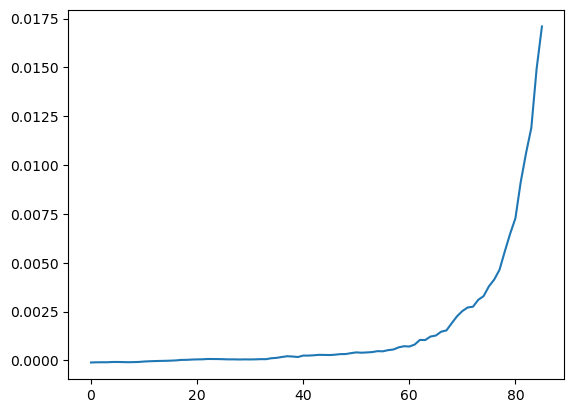

In [54]:
n = 100
c = 0.2
I = np.identity(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i):
        p = np.random.uniform(0,1)
        if p < c:
            A[i,j] = np.random.uniform(-1,1)
            A[j,i] = np.random.uniform(-1,1)
surv = np.ones(n,dtype=bool)
optim = np.zeros(n)
optim[0] = meanKatz(A)
U = -np.log(np.random.rand(n))
X = U/sum(U)
t = 0
while t < 1001:
    t = t + 1
    k1 = repl(X)
    k2 = repl(X+k1/2)
    k3 = repl(X+k2/2)
    k4 = repl(X+k3)
    X = X+(k1+2*k2+2*k3+k4)/6
    if min(X[surv]) < 1e-6:
        t = 0
        e = X.tolist().index(min(X[surv]))
        surv[e] = False
        X[e] = 0
        A[e,:] = 0
        A[:,e] = 0
        optim[n-np.sum(surv)] = meanKatz(A)
plt.plot(optim[:n+1-np.sum(surv)])
plt.show()

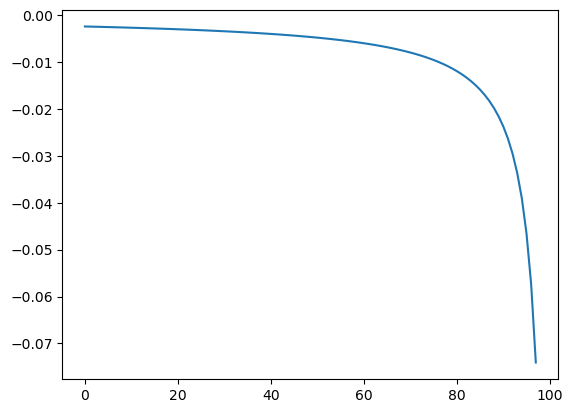

In [60]:
n = 100
I = np.identity(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i):
        A[i,j] = 1
        A[j,i] = -1
surv = np.ones(n,dtype=bool)
optim = np.zeros(n)
optim[0] = meanKatz(A)
U = -np.log(np.random.rand(n))
X = U/sum(U)
t = 0
while t < 1001:
    t = t + 1
    k1 = repl(X)
    k2 = repl(X+k1/2)
    k3 = repl(X+k2/2)
    k4 = repl(X+k3)
    X = X+(k1+2*k2+2*k3+k4)/6
    if min(X[surv]) < 1e-6:
        t = 0
        e = X.tolist().index(min(X[surv]))
        surv[e] = False
        X[e] = 0
        A[e,:] = 0
        A[:,e] = 0
        optim[n-np.sum(surv)] = meanKatz(A)
plt.plot(optim[:n+1-np.sum(surv)])
plt.show()

In [61]:
n = 100
c = 0.2
I = np.identity(n)
tot = 0
for k in range(2000):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            p = np.random.uniform(0,1)
            if p < c:
                A[i,j] = np.random.uniform(-1,1)
                A[j,i] = np.random.uniform(-1,1)
    surv = np.ones(n,dtype=bool)
    optim = np.zeros(n)
    optim[0] = meanKatz(A)
    U = -np.log(np.random.rand(n))
    X = U/sum(U)
    t = 0
    while t < 1001:
        t = t + 1
        k1 = repl(X)
        k2 = repl(X+k1/2)
        k3 = repl(X+k2/2)
        k4 = repl(X+k3)
        X = X+(k1+2*k2+2*k3+k4)/6
        if min(X[surv]) < 1e-6:
            t = 0
            e = X.tolist().index(min(X[surv]))
            surv[e] = False
            X[e] = 0
            A[e,:] = 0
            A[:,e] = 0
            optim[n-np.sum(surv)] = meanKatz(A)
    if optim[n-np.sum(surv)] > optim[0]:
        tot = tot + 1
print(tot/2000)

1.0
